
# <center> Assignment-1 </center>
# <center> Akshay Reddy Poturi - B00822804 </center>
# <center> Lakshmi Manjari Alapati - B00825788 </center>

# Introduction


---



**Data Set URL:**

[https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants](https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants)

**Data Set description**:

The Zomato dataset provided for this assignment contains data about more than 12000 different restaurants available in banglore city of india. This dataset provides the detailed information of the restaurants from zomato database. 

This dataset can be used to study and analyse the type of restaurants which customers are liking and places or locations where a particular restaurant can withstand the competion depending on various attributes such as locality, type of restaurant, cuisines offered, approximate cost in the restaurant etc.

**Attrubite description:**

1.   URL - URL of the restaurant from zomato website
2.   address - address of the restaurant
3.   name - name of the restaurant
4.   online_order - availability of online order (yes/no)
5.   book_table - availability to book table (yes/no)
6.   rate - average rating of the restaurant
7.   votes - total number of ratings
8.   phone - phone number of restaurant
9.   location - neighbourhood of the restaurant
10. rest_type - type of restaurant
11. dish_liked - list of dishes people liked in the restaurant
12. cuisines - food styles of the restaurant
13. approx_cost(for two people) - approximate cost of meal for two people
14. reviews_list - list containing rating and review by the customers
15. menu_item - menu of the restaurant
16. listed_in(type) - type of order(delivery/dine-in/buffet etc)
17. listed_in_city - neighbourhood in which the restaurant is listed


In [13]:
# LOAD DATA
import pandas as pd
 
df = pd.read_csv("zomato.csv")

In [14]:
df.shape

(51717, 17)

In [15]:
#checking all the attributes present in the data
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [16]:
# finding columns with null values in the given dataset
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [17]:
# number of records with empty listed values for "menu_item" column

len(df.loc[df['menu_item'] == '[]'])

39617

# Exploring the data

---

*   The data frame contains a total of 51717 rows and 17 columns.
*   Once the data is loaded into the data frame "df", we tried to check total number of null values that exist in each of the column.
*   A total of 7775 null values are found in "rate" column and can be considered to remove from the data. However, we decided to keep it since the assignment excepts us to work further on this column.
*   "phone" column contains 1208 null values and so, we have decided to remove this column
*   "dish_liked" column contains 28078 null values and so this column is decided to be removed
* Even though "menu_item" does not show any null values, the above command shows the number of empty listed values which is 39617. So, we have decided to remove this column.
* The column "url" is considered to be useless at this point and so, it is decided to be removed.
*    The columns "location", "rest_type", "cuisines" and "approx_cost (for two people)" contains minimal number of null values and so, they can be handled in the data during preprocessing without removing them.  
*    Before plotting the attributes, we are performing slice and replace operations on RATE and APPROX_COST(FOR TWO PEOPLE) columns to remove "/5"s in RATE column, and commas in APPROX_COST(FOR TWO PEOPLE) column. "NEW", "-" values in RATE column and null values in both the column will be replaced with meaningful values in later phase of the assignment.



In [18]:
# RATE and APPROX_COST(FOR TWO PEOPLE)

# slicing RATE into decimals and convert to float
df.rate = df.rate.str.slice(0,3)

# removing commas in the values
df['approx_cost(for two people)']= df['approx_cost(for two people)'].str.replace(',', '')

# Plot distribution of attributes



### Plot "rate" column: 



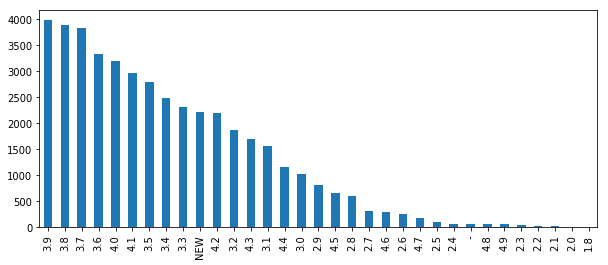

In [50]:
#plot RATE column frequency
df['rate'].value_counts().plot(kind='bar', figsize=(10, 4))

### Plot "listed_in(city)" column: 

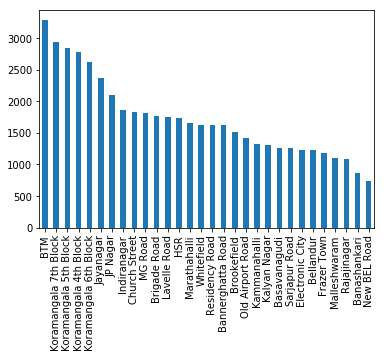

In [51]:
#plot LISTED_IN(CITY) column frequency
df['listed_in(city)'].value_counts().plot(kind='bar')

### Plot "online_order" column: 



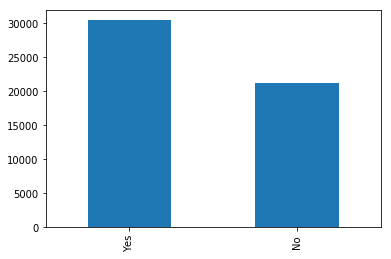

In [52]:
#plot ONLINE_ORDER column frequency
df['online_order'].value_counts().plot(kind='bar')

### Plot "book_table" column: 

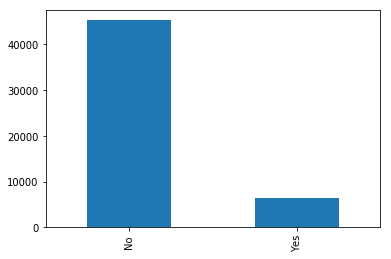

In [53]:
#plot BOOK_TABLE column frequency
df['book_table'].value_counts().plot(kind='bar')

### Plot "listed_in(type)" column:


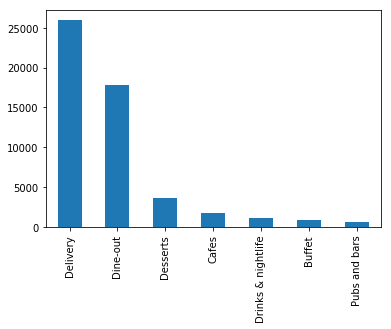

In [54]:
#plot TYPE_OF_MEAL column frequency
df['listed_in(type)'].value_counts().plot(kind='bar')

# Data Cleaning

---


*   Removed columns "phone", "url", "dish_liked", "menu_item"
*   Renamed the columns "listed_in(type)" and "rest_type"
* Changed all the column names to upper case
* Dropped the duplicate rows in all 13 columns
* Deleted the restaurant duplicates from the data. We have assumed the restaurants as duplicates if they share same name and address.
* Dropped rows if all the 5 major columns mentioned in the assignment contains null values. i.e., RATE, LOCATION, RESTAURANT_TYPE, CUISINES and APPROX_COST(FOR TWO PEOPLE)
* Replaced null values in RESTAURANT_TYPE and CUISINES with "N/A"
* All the values in the RATE column that are "New", "-" and null are replaced with mean rating of the respective locations. The value of this column is rounded to 1 decimal place. The rows that are still remained with null are deleted.
* All the null values in the APPROX_COST(FOR TWO PEOPLE) column are replaced with mean cost of the respective locations. The value of this column is rounded to 2 decimal places. The rows that are still remained with null are deleted.


In [19]:
#deleting the unwanted columns

del df['phone']
del df['url']
del df['dish_liked']
del df['menu_item']

In [20]:
#renaming the columns
df=df.rename(columns = {'rest_type':'restaurant_type','listed_in(type)':'type_of_meal'})

#converting all the columns to upper case
df.columns = df.columns.str.upper()

In [21]:
# drop all duplicate rows
df.drop_duplicates(keep=False,inplace=True) 

# removing the duplicate restaurants
df = df.drop_duplicates(['NAME','ADDRESS'], keep= 'first')

In [22]:
# delete rows with null values for all 5 major attributes
values = df[(df['RATE'].isna())
            & (df['LOCATION'].isna()) 
            & (df['RESTAURANT_TYPE'].isna()) 
            & (df['CUISINES'].isna()) 
            & (df['APPROX_COST(FOR TWO PEOPLE)'].isna())].index
df.drop(values , inplace=True)

In [23]:
# replacing null values with 'N/A' for RESTAURANT_TYPE, CUISINES columns

df ['RESTAURANT_TYPE'].fillna('N/A',inplace=True)
df ['CUISINES'].fillna('N/A',inplace=True)

In [24]:
# RATE

import numpy as np

# replacing nulls, 'NEW', '-' values with NaN 
df['RATE'] = df['RATE'].replace('NEW', np.NaN)
df['RATE'] = df['RATE'].replace('-', np.NaN)
df ['RATE'].fillna(np.NaN,inplace=True)

df.RATE = df.RATE.astype(float)

# replace NaN values in RATE column with mean grouping by LOCATION, RESTAURANT_TYPE
df['RATE'] = df.groupby(['LOCATION','RESTAURANT_TYPE'])['RATE'].transform(lambda x: x.fillna(x.mean()))

In [25]:
# APPROX_COST(FOR TWO PEOPLE)

# replace nulls with NaN and convert column to float
df['APPROX_COST(FOR TWO PEOPLE)'].fillna(np.NaN,inplace=True)
df['APPROX_COST(FOR TWO PEOPLE)'] = df['APPROX_COST(FOR TWO PEOPLE)'].astype(float)

# replace NaN values with mean grouping by LOCATION, RESTAURANT_TYPE
df['APPROX_COST(FOR TWO PEOPLE)'] = df.groupby(['LOCATION','RESTAURANT_TYPE'])['APPROX_COST(FOR TWO PEOPLE)'].transform(lambda x: x.fillna(x.mean()))

In [26]:
# rounding the RATE and APPROX_COST(FOR TWO PEOPLE) columns to fixed number of decimal places

df.RATE = round(df.RATE,1)
df['APPROX_COST(FOR TWO PEOPLE)'] = round(df['APPROX_COST(FOR TWO PEOPLE)'],2)

In [27]:
# removing remaining null rows

df = df[pd.notna(df['RATE'])]
df = df[pd.notna(df['APPROX_COST(FOR TWO PEOPLE)'])]

# Trends observed in data

---
---
1) There are a total of 87 unique restaurant types and the below observation shows the locations covering number of restaurant types.

The locations such as "Whitefield", " Indira Nagar", "HSR" covers around half of the restaurant types where as locations including "koramangala", "Yelahanka" are covering only one restaurant type. 

In [67]:
y = pd.DataFrame(df.groupby('LOCATION')['RESTAURANT_TYPE'].nunique())
y.sort_values('RESTAURANT_TYPE' , ascending = False)

,RESTAURANT_TYPE
LOCATION,
Whitefield,45
Indiranagar,41
HSR,40
Bellandur,36
Marathahalli,36
JP Nagar,34
Electronic City,32
Malleshwaram,32
Koramangala 5th Block,32


---

2) The below observation is to analyze the approximate cost of meal per two people against the ratings of the restaurant. Even though the restaurants with highest ratings of 4.9, 4.7 tops the list with high prices, the restaurants with low rating of 1.8 also has high average costs. This clearly shows that RATE might not be the perfect attribute to estimate the approximate cost of meal for two people. 

In [68]:
y = pd.DataFrame(df.groupby('RATE')['APPROX_COST(FOR TWO PEOPLE)'].mean())
y.sort_values('APPROX_COST(FOR TWO PEOPLE)' , ascending = False)

,APPROX_COST(FOR TWO PEOPLE)
RATE,
4.9,1322.222222
4.7,1295.000000
1.8,1200.000000
2.0,1150.000000
4.6,1147.872340
4.5,1078.260870
4.4,1066.244671
4.3,1053.749585
4.8,992.307692


---
3) The below observation shows the average ratings of the restaurants by their types. 

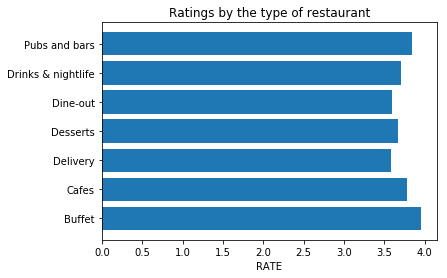

In [69]:
# plot showing average ratings of restaurants by their types

import matplotlib.pyplot as plt

y = pd.DataFrame(df.groupby('TYPE_OF_MEAL')['RATE'].mean())

performance = [round(y.values[0][0],2), round(y.values[1][0],2), round(y.values[2][0],2), round(y.values[3][0],2),
              round(y.values[4][0],2), round(y.values[5][0],2), round(y.values[6][0],2)
              ]
objects = (y.index[0],y.index[1],y.index[2],y.index[3],y.index[4],y.index[5],y.index[6])
y_pos = np.arange(len(objects))
bar_width = 0.8

plt.barh(y_pos, performance, align='center', alpha=1)
plt.yticks(y_pos, objects)
plt.xlabel('RATE')
plt.title('Ratings by the type of restaurant')

plt.show()

---
4) The below observation shows the average ratings of the restaurants by the type of order. With the below plot, it is observed that restaurants has similar average ratings irrespective of the type of order(Online or not)

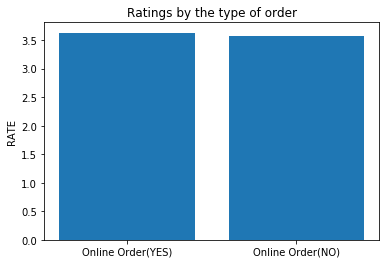

In [70]:
# plot showing average ratings of the restaurants by the type of order

import matplotlib.pyplot as plt

y=pd.DataFrame(df.groupby('ONLINE_ORDER')['RATE'].mean())
yes_rating = (y.values[1])
no_rating = (y.values[0])

performance = [round(yes_rating[0],2), round(no_rating[0],2)]
objects = ('Online Order(YES)', 'Online Order(NO)')
y_pos = np.arange(len(objects))

plt.bar(y_pos, performance, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('RATE')
plt.title('Ratings by the type of order')

plt.show()

# Neighbourhood with highest average rating

Here, the neighbourhood with highest rating is identified. While neighbourhood can be either of the columns, LOCATION and LISTED_IN(CITY), we considered LISTED_IN(CITY) to find out the highest rated neighbourhood. 

As per the results, 'Brigade Road' is identified as the highest rated locality and the table shows the **characteristics** of that location. The table displays -


*   total number of restaurants - 1009
*   has 56 unique type of restaurants 
*  has restaurants that offers both online and offline orders
* has restaurants that offers to book table
* offers 523 unique type of cuisines 
* Approximate cost per meal for two people - 708.79 rupees
* offers 7 unique type of meals such as buffet, cafes, desserts etc.



In [72]:
# find neighborhood with highest rating

df['RATE'].groupby(df['LISTED_IN(CITY)'], sort=False).mean().sort_values(ascending=False)
br = df.loc[df['LISTED_IN(CITY)'] == 'Brigade Road']

In [73]:
#printing the charecteristics of the highest average neighbourhood ("Brigade Road" in this case)

d = {'LOCATION':['Brigade Road'],        
        'NO OF RESTAURANTS' : len(br.index),
        'RESTAURANT TYPES': len(br.RESTAURANT_TYPE.unique()),
        'ONLINE ORDER': len(br.ONLINE_ORDER.unique()),
        'BOOK TABLE': len(br.BOOK_TABLE.unique()),
        'CUISINES': len(br.CUISINES.unique()),
        'APPROX_COST(FOR TWO PEOPLE)': br['APPROX_COST(FOR TWO PEOPLE)'].mean(),
        'TYPE OF MEAL': len(br.TYPE_OF_MEAL.unique())
    }
brigade_road = pd.DataFrame(data=d)
brigade_road

,LOCATION,NO OF RESTAURANTS,RESTAURANT TYPES,ONLINE ORDER,BOOK TABLE,CUISINES,APPROX_COST(FOR TWO PEOPLE),TYPE OF MEAL
0,Brigade Road,1009,56,2,2,523,708.790882,7


# Task that is being solved

The problem that is asked to solve in this assignment is to build a model to forecast the approximate cost of a meal for two people using the attributes location, rating, restaurant type, and cuisine.

This problem comes under supervised learning as there is a target to find the approximate cost for two people for a meal and it is a regression problem as we are finding the value of a column which is a continuous value for a given restaurant. This is not a classification problem because the value we are trying to find out is numeric and does not contain any classes to classify.

---

# Models chosen

Initially we have tried with various algorithms like Linear Regression, Decision Tree Regressor, Random Forest Regressor and 
XG Boost on our data. We have chosen the model that performed best on both training and testing data. 

We have compared the model performances on both training data and testing data and it turns out that random forest regressor best fits the given data in this case comparatively. Random Forest Regressor is an ensemble technique which will build the multiple trees with random samples from training data with random features and takes the weighted voting of all the results from different trees. 

**NOTE:** We have removed Linear regression because even though it performed very well on training data, it miserably failed to perform on testing data. Hence, we considered other models.


---

# Metrics choosed for evaluation

We will use the Mean Absolute Error(MAE) and R2_score metrics for the evaluation of models. 

In Mean Absolute Error, the error will be calculated as an average of absolute differences between the target values and the predictions. The coefficient of determination or R2 score, is another metric we use to evaluate a model and it is closely related to Mean Squared Error, but has the advantage of being scale-free. The acceptable R2 score is between 0 and 1 and When R2 is negative it means that the model is worse than predicting the mean. While the best R2 score can be 1, if the performance of model is too close to 1, it might indicate that the model is overfitting. In this case, we have to ensure that the model is not overfitting by using any of the machine learning techniques. 

---

# Overfitting - Evaluation metrics - Cross validation

Once our model is built, we might not sure if the model will perform well on the new and unseen data or not. To ensure the model's performance on unseen data, we need to do some kind of validation after which we can get to know if the model is underfitting/over fitting/generalizing well. 


In our case, to make sure our model is not overfitting, we will do sample validation(test-train-split) and K-folds(cross validation with 5-10 folds) by splitting the entire data which separates the test data and train data. We will first check the performance of model on training data and compare with the performance on unseen data. If the model is performing well on new data as well, there are still chances that the model is biased. Therefore, we will perform cross validation with K-folds to make sure the model is not biased.
 


In [28]:
# import sklearn's train_test_split

from sklearn.model_selection import train_test_split

In [47]:
# scaling numerical columns 'RATE', 'APPROX_COST(FOR TWO PEOPLE)' using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['RATE', 'APPROX_COST(FOR TWO PEOPLE)']] = scaler.fit_transform(df[['RATE', 'APPROX_COST(FOR TWO PEOPLE)']])

In [55]:
# One Hot Encoding

ak = df[['LOCATION','RESTAURANT_TYPE','RATE','CUISINES']]
ak_dummies = pd.get_dummies(ak)

target = df['APPROX_COST(FOR TWO PEOPLE)']

In [56]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(ak_dummies, target, test_size=0.2, random_state=42)

# Decision Tree Regressor

In [57]:
# Decision tree regressor

from sklearn.tree import DecisionTreeRegressor
DT_model = DecisionTreeRegressor().fit(X_train,y_train)

y_pred = DT_model.predict(X_test)
y_pred_train = DT_model.predict(X_train)

In [58]:
# Evaluation on training data - Sample validation

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

mae_train_dt = mean_absolute_error(y_train, y_pred_train)
r2_train_dt = r2_score(y_train, y_pred_train)

print("Mean Absolute Error: ", mae_train_dt)
print("Trainig data validation R2score: ", r2_train_dt)


Mean Absolute Error:  0.001641261071459825
Trainig data validation R2score:  0.9923044622740543


**Evaluation:** Decision tree regressor performed very well on training data with an R2 score of 0.99 and MAE of 0.001. 

In [59]:
# Evaluation on testing data - Sample validation

mae_test_dt =  mean_absolute_error(y_test, y_pred)
r2_test_dt = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mae_test_dt)
print("Sample validation R2score: ", r2_test_dt)


Mean Absolute Error:  0.023913620641889833
Sample validation R2score:  0.5515857844970184


In [60]:
# Evaluation - Cross validation

from sklearn.model_selection import cross_val_score
CV_DT = cross_val_score(DT_model, ak_dummies, target, cv=5)
print("Cross validation score: ", CV_DT.mean())

Cross validation score:  0.6030019035553561


**Evaluation:** Decision tree regressor performed considerably low compared with training data. Even though sample validation performed with a score of 0.55, cross validation score comes out to be 0.60 on 5-folds. Below are the plots that shows the performance on training and testing data as well as sample and cross validation by their R2 scores.

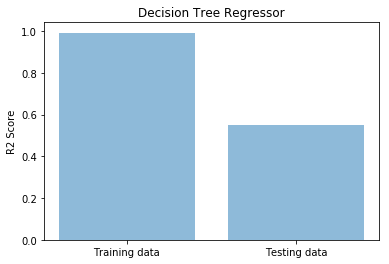

In [63]:
# plot showing R2 score of decision tree performance on training data and testing data(sample validation)

import matplotlib.pyplot as plt

performance = [r2_train_dt,r2_test_dt]
objects = ('Training data', 'Testing data')
y_pos = np.arange(len(objects))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('R2 Score')
plt.title('Decision Tree Regressor')

plt.show()

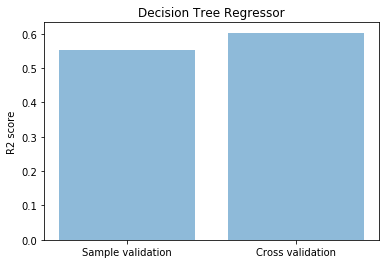

In [62]:
# plot showing R2 score of Decision tree performance by sample vaidation and cross validation

import matplotlib.pyplot as plt

performance = [r2_test_dt, CV_DT.mean()]
objects = ('Sample validation', 'Cross validation')
y_pos = np.arange(len(objects))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('R2 score')
plt.title('Decision Tree Regressor')

plt.show()

# Random Forest Regressor

In [66]:
# Random Forest regressor

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 50, random_state = 21) 
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [67]:
# Evaluation on training data - Sample validation

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

mae_train_rf = mean_absolute_error(y_train, y_pred_train)
r2_train_rf = r2_score(y_train, y_pred_train)

print("Mean Absolute Error: ", mae_train_rf)
print("R2score: ", r2_train_rf)

Mean Absolute Error:  0.00856043220599418
R2score:  0.9560452129842337


**Evaluation:** Random Forest Regressor performed very well on training data with an R2 score of 0.95 and MAE of 0.001. 

In [68]:
# Evaluation on testing data - Sample validation

mae_test_rf =  mean_absolute_error(y_test, y_pred)
r2_test_rf = r2_score(y_test, y_pred)

print("Mean Absolute Error: ", mae_test_rf)
print("R2score: ", r2_test_rf)


Mean Absolute Error:  0.02090131004157761
R2score:  0.6887683640271731


In [69]:
# Evaluation - Cross validation

from sklearn.model_selection import cross_val_score
CV_rf = cross_val_score(rf, ak_dummies, target, cv=5)
print("Cross validation score: ", CV_rf.mean())

Cross validation score:  0.7016514889814323


**Evaluation:** Random Forest regressor performed slightly low compared with training data. Even though sample validation performed with a score of 0.68, cross validation score comes out to be 0.70 on 5-folds. Random Forest performed with a decent R2 score of 0.70. Below are the plots that shows the performance on training and testing data as well as sample and cross validation by their R2 scores.

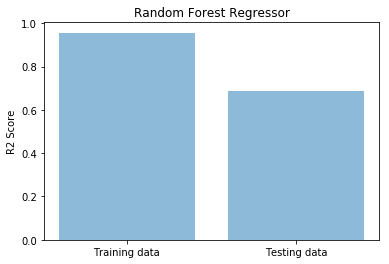

In [70]:
# plot showing R2 score of Random Forest regressor performance on training data and testing data

import matplotlib.pyplot as plt

performance = [r2_train_rf,r2_test_rf]
objects = ('Training data', 'Testing data')
y_pos = np.arange(len(objects))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('R2 Score')
plt.title('Random Forest Regressor')

plt.show()

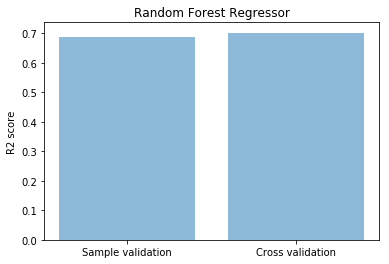

In [71]:
# plot showing R2 score of Random Forest performance by sample vaidation and cross validation

import matplotlib.pyplot as plt

performance = [r2_test_rf, CV_rf.mean()]
objects = ('Sample validation', 'Cross validation')
y_pos = np.arange(len(objects))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('R2 score')
plt.title('Random Forest Regressor')

plt.show()

# XG Boost Regressor

In [73]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [74]:
#from xgboost.sklearn import XGBRegressor

import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', n_estimators = 50)

In [75]:
xg_reg.fit(X_train,y_train)

C:\Users\Manju\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:27:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [76]:
# Evaluation of performance of XG Boost on training data

preds_train = xg_reg.predict(X_train)
r2_train_xg= r2_score(y_train, preds_train)
print(r2_train_xg)

0.6801519669782252


**Evaluation:** XG Boost performed low on training data with R2 score of 0.68. Clearly it is under performing compared with the other models tried above.

In [77]:
# Evaluation of performance of XG Boost on testing data

preds = xg_reg.predict(X_test)
r2_test_xg = r2_score(y_test, preds)
print(r2_test_xg)

0.612493365699669


In [79]:
# Cross validation with 5-folds

scoresB_xg = cross_val_score(xg_reg, ak_dummies, target, cv=5)
print("Cross validation score: ", scoresB_xg.mean())

[21:28:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Manju\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:29:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Manju\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:30:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Manju\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:31:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Manju\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:32:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Cross validation score:  0.6128706892812803


**Evaluation:** XG Boost is performing almost similar to the training data with a cross validation score of 0.61

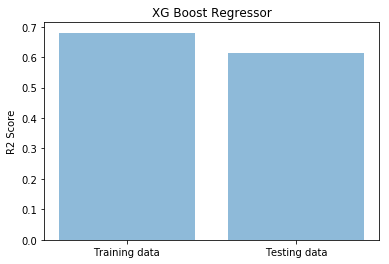

In [80]:
# plot showing R2 score of XG Boost regressor performance on training data and testing data

import matplotlib.pyplot as plt

performance = [r2_train_xg,r2_test_xg]
objects = ('Training data', 'Testing data')
y_pos = np.arange(len(objects))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('R2 Score')
plt.title('XG Boost Regressor')

plt.show()

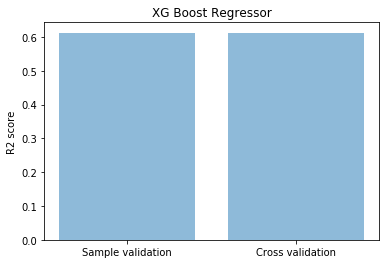

In [81]:
# plot showing R2 score of XG Boost regressor performance by sample vaidation and cross validation

import matplotlib.pyplot as plt

performance = [r2_test_xg, scoresB_xg.mean()]
objects = ('Sample validation', 'Cross validation')
y_pos = np.arange(len(objects))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('R2 score')
plt.title('XG Boost Regressor')

plt.show()

# Comparision of performances of models

Based on the below comparision, as Random Forest Regressor performs better compared with other two models, we have chosen this model as the final model. This Random Forest Regressor gives the R2 score of 0.701 with cross validation approach of 5-folds.

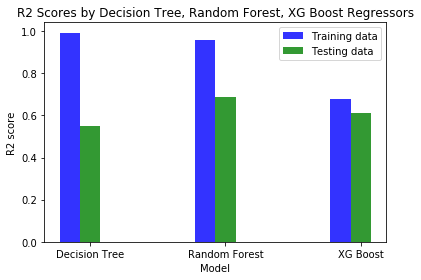

In [82]:
import matplotlib.pyplot as plt

# data to plot
n_groups = 5
score_training = (r2_train_dt, r2_train_rf, r2_train_xg)
score_test = (r2_test_dt, r2_test_rf, r2_test_xg)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8

rects1 = plt.bar(index, score_training, bar_width,
alpha=opacity,
color='b',
label='Training data')

rects2 = plt.bar(index + bar_width, score_test, bar_width,
alpha=opacity,
color='g',
label='Testing data')

plt.xlabel('Model')
plt.ylabel('R2 score')
plt.title('R2 Scores by Decision Tree, Random Forest, XG Boost Regressors')
plt.xticks(index + bar_width, ('Decision Tree', 'Random Forest', 'XG Boost'))
plt.legend()

plt.tight_layout()
plt.show()

# Grid Search - Hyper parameter tuning the model to perform better


Hyper Parameter tuning means tuning the characteristics of the model that are internal and explicit to the model which cannot be estimated from the data. These parameters has to be set before fitting the model to the data. Grid Search approach helps us to find the optimal values for hyper parameters that provides best accurate results. Since, out of all the models we tried on the data, Random Forest regressor performed better, we are trying to tune the Random Forest Regressor to improve the model performance. Below is the approach tried with Grid Search with various values of n_estimators and random_state.

In [85]:
# Create the parameter grid based on the results of random search 
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators':[250, 200],
    'random_state':[42,52]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [86]:
grid_search.fit(X_train, y_train)    

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:  8.2min remaining: 16.4min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 13.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [250, 200], 'random_state': [42, 52]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [87]:
# best pair of parameters provided by grid search

grid_search.best_params_

{'n_estimators': 200, 'random_state': 52}

In [84]:
# Best score provided by Grid Search

grid_search.best_score_ 

0.7265312384567382

**Evaluation:** After performing Grid Search for tuning the Hyper parameters of the Random Forest Regressor, the above results of best_params_ attribute shows the best hyper parameters that suggests the values for n_estimators and random_state that improves the accuracy and performance of the model. 

The attribute "best_score_" of the grid search provides the mean cross-validated score(R2 score) of the best_estimator. Here, we have got the cross validated score of 0.726 which clearly shows an improvement of 2% compared to the Random Forest Regressor performed before Grid Search. 

Before performing the Grid Search, our Random Forest Regressor was using n_estimators of 50 and random_state of 21. Whereas, Grid search provides the best values of these parameters as 200 for n_estimators and 52 for random_state. This is the reason why our model has improved its performance.

Thus, Grid Search helped us in improving the performance of the model by 2%.

# Relief Feature Selection

Relief Based Algorithms are helpful in feature selection with supervised learning. These algorithms offer computationally efficient ways of feature selection without performing exhaustive search of parameters and evaluating pair wise performances unliked currently avaiable filter based feature selection techniques. This approach gives score for each feature and by sorting the features by their ranks, it provides top features that best provides the performance.

We have tried Relief feature selection approach "ReliefF" but we could not get the expected results.

In [0]:
pip install skrebate==0.6

  Stored in directory: /Users/akshayreddypoturi/Library/Caches/pip/wheels/f5/99/36/c827bcfa6852c6d068895b2723c57cea84f93642270c6dc05c
Successfully built skrebate
Note: you may need to restart the kernel to use updated packages.


In [0]:
from skrebate import ReliefF
from sklearn.pipeline import make_pipeline


In [0]:
rlf = make_pipeline(ReliefF(n_features_to_select=2, n_neighbors=100),
                    RandomForestRegressor(n_estimators=100))



In [ ]:
#print(cross_val_score(clf, ak_dummies, target).mean())

from sklearn.model_selection import cross_val_score
CV_rlf = cross_val_score(rlf, ak_dummies, target, cv=10)
print("Cross validation score: ", CV_rlf.mean())

# References

* [1] “Group By: split-apply-combine¶,” Group By: split-apply-combine - pandas 0.24.2 documentation. [Online]. Available: http://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html. [Accessed: 03-Jul-2019].

* [2] “Matplotlib Bar chart,” pythonspot, 28-Jul-2016. [Online]. Available: https://pythonspot.com/matplotlib-bar-chart/. [Accessed: 03-Jul-2019].

* [3] /@krishnihw, “A Beginners Guide to Random Forest Regression - Data Driven Investor,” Medium, 05-Jun-2019. [Online]. Available: https://medium.com/datadriveninvestor/random-forest-regression-9871bc9a25eb. [Accessed: 03-Jul-2019].

* [4] /@williamkoehrsen, “Hyperparameter Tuning the Random Forest in Python - Towards Data Science,” Medium, 10-Jan-2018. [Online]. Available: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74. [Accessed: 03-Jul-2019].

* [5] “sklearn.model_selection.GridSearchCV¶,” scikit. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html. [Accessed: 03-Jul-2019].

* [6] “pandas.DataFrame¶,” pandas.DataFrame - pandas 0.24.2 documentation. [Online]. Available: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html. [Accessed: 03-Jul-2019].

* [7] A. Bronshtein and A. Bronshtein, “Train/Test Split and Cross Validation in Python,” Towards Data Science, 17-May-2017. [Online]. Available: https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6. [Accessed: 03-Jul-2019].

* [8] EpistasisLab, “EpistasisLab/scikit-rebate,” GitHub, 23-May-2018. [Online]. Available: https://github.com/EpistasisLab/scikit-rebate. [Accessed: 03-Jul-2019].

* [9] C. Albon, “Delete Duplicates In pandas,” Chris Albon, 20-Dec-2017. [Online]. Available: https://chrisalbon.com/python/data_wrangling/pandas_delete_duplicates/. [Accessed: 03-Jul-2019].

* [10] /@aswalin, “Choosing the Right Metric for Evaluating Machine Learning Models - Part 1,” Medium, 10-Jul-2018. [Online]. Available: https://medium.com/usf-msds/choosing-the-right-metric-for-machine-learning-models-part-1-a99d7d7414e4. [Accessed: 03-Jul-2019].